<font size="9"><br/>Data Set Generation</font>

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import csv
import pandas as pd

#f = csv.writer(open('ffm-area-rents', 'w'))
#f.writerow(['total_rent','living_space','nr_of_rooms','building_type','age_of_building','zip_code','region','street'])

def scrape():
    WEBSITE = 'https://www.immobilienscout24.de'
    LAST_PAGE = 223
    pages = []
    listings = []

    # get links to all pages of the search results for rented flats in the Frankfurt area
    for i in range(1, LAST_PAGE + 1):
        pages.append("https://www.immobilienscout24.de/Suche/S-T/P-%d/Wohnung-Miete/Polygonsuche/c3ducEhxaGtyQH5jakBpZ2BAeW9NfXloQG1pUm91UHd9R214YEBraF5yeEpzekVyd2dAdHhDYmRmQHZrTGRvXA.." % (i))
   
        #get each link in the listing
        for item in pages:
            page = requests.get(item)
            soup = BeautifulSoup(page.text, "html.parser")
            for link in soup.find_all("a"):
                if r"/expose/" in str(link.get("href")):
                    route = link.get("href")
                    #extract data from each listing and write it to a csv file
                    getDataFromListing(WEBSITE + route)
                    
                     
                    
def getDataFromListing(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')

    try:
        total_rent = re.sub('[^\d,]+', '', soup.find(class_='is24qa-gesamtmiete').text.strip()).split(",")[0]
    except:
        total_rent = ''
    
    try:
        living_space = re.sub('[^\d,]+', '', soup.find(class_='is24qa-wohnflaeche-ca').text.strip()).split(",")[0]
    except:
        living_space = ''
    
    try:
        nr_of_rooms = soup.find(class_='is24qa-zimmer').text.strip()
    except:
        nr_of_rooms = ''
    
    try:
        building_type = soup.find(class_='is24qa-typ').text.strip()
    except:
        building_type = ''
    
    try:
        age_of_building = 2019 - int(soup.find(class_='is24qa-baujahr').text.strip())
    except:
        age_of_building = ''
    
    try:
        zip_and_region = soup.find(class_='zip-region-and-country').text.strip()
        zip_code = re.sub('[^\d]+', '', zip_and_region).strip()
        region = re.sub('[\d]+', '', zip_and_region).strip()
    except:
        zip_code = ''
        region = ''
    
    try:
        street = soup.find(class_='block font-nowrap print-hide').text.strip()[:-1]
    except:
        street = ''
    print(street)
    
    #f.writerow([total_rent,living_space, nr_of_rooms, building_type, age_of_building, zip_code, region, street])


#scrape()

In [3]:
# add longitude and latitude values
from time import sleep

latitude = []
longitude = []

dataset = pd.read_csv('datasets/ffm-area-rents', nrows=2400)

for index, row in dataset.iterrows():
    query = str(row['street']) + ', ' + str(row['zip_code']) + ', ' + str(row['region'])
    data = requests.get(url='https://api.opencagedata.com/geocode/v1/json', 
                        params={'q': query, 'key':'c3d62d04a89545a2b0b4857c5c033a6c', 'language':'de', 'pretty': 1}).json()
    try:
        lat = data['results'][0]['geometry']['lat']
        lng = data['results'][0]['geometry']['lng']
    except:
        lat = ''
        lng = ''
    latitude.append(lat)
    longitude.append(lng)
    print(index, lat, lng)  
    sleep(1)
    

dataset['latitude'] = latitude
dataset['longitude'] = longitude
dataset.to_csv('new_data.csv')

0 50.1223606 8.637532
1 50.1223606 8.637532
2 50.1223606 8.637532
3 50.172883 8.641283
4 50.172883 8.641283
5 50.172883 8.641283
6 50.172883 8.641283
7 50.172883 8.641283
8 50.172883 8.641283
9 50.172883 8.641283
10 50.172883 8.641283
11 50.172883 8.641283
12 50.172883 8.641283
13 50.172883 8.641283
14 50.172883 8.641283
15 50.1022568 8.6364922
16 50.1022568 8.6364922
17 50.1022568 8.6364922
18 50.1022568 8.6364922
19 49.92139 8.48255
20 49.92139 8.48255
21 49.92139 8.48255
22 49.92139 8.48255
23 49.92139 8.48255
24  
25  
26  
27  
28  
29 50.1038405 8.6431009
30 50.1038405 8.6431009
31 50.1038405 8.6431009
32 50.1038405 8.6431009
33 50.1038405 8.6431009
34 50.1038405 8.6431009
35 50.108501 8.642324
36 50.108501 8.642324
37 50.108501 8.642324
38 50.108501 8.642324
39 50.108501 8.642324
40 50.0805613 8.6367016
41 50.0805613 8.6367016
42 50.0805613 8.6367016
43 50.0805613 8.6367016
44 50.0805613 8.6367016
45 50.1152864 8.6503827
46 50.1152864 8.6503827
47 50.1152864 8.6503827
48 50.1152

375 50.1022568 8.6364922
376 50.1022568 8.6364922
377 50.1022568 8.6364922
378 50.1022568 8.6364922
379 50.1008277 8.6609364
380 50.1008277 8.6609364
381 50.1008277 8.6609364
382 50.1008277 8.6609364
383 50.1008277 8.6609364
384 50.1263563 8.6679209
385 50.1263563 8.6679209
386 50.1263563 8.6679209
387 50.1263563 8.6679209
388 50.1263563 8.6679209
389 50.1943621 8.7408978
390 50.1943621 8.7408978
391 50.1943621 8.7408978
392 50.1943621 8.7408978
393 50.1943621 8.7408978
394 50.1943621 8.7408978
395 50.0835803 8.6448152
396 50.0835803 8.6448152
397 50.0835803 8.6448152
398 50.0835803 8.6448152
399 50.0835803 8.6448152
400 50.0835803 8.6448152
401 50.0835803 8.6448152
402 50.0835803 8.6448152
403 50.0835803 8.6448152
404 50.0835803 8.6448152
405 50.0835803 8.6448152
406 50.0835803 8.6448152
407 49.92139 8.48255
408 49.92139 8.48255
409 49.92139 8.48255
410 49.92139 8.48255
411 49.92139 8.48255
412 50.1080524 8.6821609
413 50.1080524 8.6821609
414 50.1080524 8.6821609
415 50.1080524 8.682

719 50.1080524 8.6821609
720 50.1080524 8.6821609
721 50.1080524 8.6821609
722 50.1249136 8.67795
723 50.1249136 8.67795
724 50.1249136 8.67795
725 50.1249136 8.67795
726 50.1249136 8.67795
727 50.1238415 8.6811074
728 50.1238415 8.6811074
729 50.1238415 8.6811074
730 50.1238415 8.6811074
731 50.1238415 8.6811074
732 50.0984017 8.6962878
733 50.0984017 8.6962878
734 50.0984017 8.6962878
735 50.0972062 8.693573
736 50.0972062 8.693573
737 50.2313417 8.7717673
738 50.2313417 8.7717673
739 50.2313417 8.7717673
740 50.2313417 8.7717673
741 50.1198669 8.5240684
742 50.1198669 8.5240684
743 50.1198669 8.5240684
744 50.1198669 8.5240684
745 50.1198669 8.5240684
746 49.8707419 8.6360428
747 49.8707419 8.6360428
748 49.8707419 8.6360428
749 49.8707419 8.6360428
750 49.8707419 8.6360428
751 50.0809846 8.6229756
752 50.0809846 8.6229756
753 50.0809846 8.6229756
754 50.0829548 8.5789168
755 50.0829548 8.5789168
756 50.0829548 8.5789168
757 50.0829548 8.5789168
758 50.0829548 8.5789168
759 50.08295

1065  
1066  
1067  
1068  
1069  
1070 50.1022568 8.6364922
1071 50.1022568 8.6364922
1072 50.1022568 8.6364922
1073 50.1022568 8.6364922
1074 50.1022568 8.6364922
1075 50.1008277 8.6609364
1076 50.1008277 8.6609364
1077 50.1008277 8.6609364
1078 50.1008277 8.6609364
1079 50.1008277 8.6609364
1080 50.1263563 8.6679209
1081 50.1263563 8.6679209
1082 50.1263563 8.6679209
1083 50.1263563 8.6679209
1084 50.1263563 8.6679209
1085 50.1943621 8.7408978
1086 50.1943621 8.7408978
1087 50.1943621 8.7408978
1088 50.1943621 8.7408978
1089 50.1943621 8.7408978
1090 50.1943621 8.7408978
1091 50.0835803 8.6448152
1092 50.0835803 8.6448152
1093 50.0835803 8.6448152
1094 50.0835803 8.6448152
1095 50.0835803 8.6448152
1096 50.0835803 8.6448152
1097 50.0835803 8.6448152
1098 50.0835803 8.6448152
1099 50.0835803 8.6448152
1100 50.0835803 8.6448152
1101 50.0835803 8.6448152
1102 50.0835803 8.6448152
1103 49.92139 8.48255
1104 49.92139 8.48255
1105 49.92139 8.48255
1106 49.92139 8.48255
1107 49.92139 8.482

1395 50.1870753 8.598322
1396 50.1870753 8.598322
1397 50.1870753 8.598322
1398 50.086099 8.6466793
1399 50.086099 8.6466793
1400 50.086099 8.6466793
1401 50.086099 8.6466793
1402 50.086099 8.6466793
1403 50.1344162 8.8331193
1404 50.1344162 8.8331193
1405 50.1344162 8.8331193
1406 50.1344162 8.8331193
1407 49.9916 8.6775
1408 49.9916 8.6775
1409 49.9916 8.6775
1410 49.9916 8.6775
1411  
1412  
1413  
1414  
1415 50.12597 8.69662
1416 50.12597 8.69662
1417 50.12597 8.69662
1418 50.12597 8.69662
1419  
1420  
1421  
1422  
1423  
1424 50.1129679 8.7048807
1425 50.1129679 8.7048807
1426 50.1129679 8.7048807
1427 50.1989105 8.5877692
1428 50.1989105 8.5877692
1429 50.1989105 8.5877692
1430 50.1989105 8.5877692
1431 50.1571533 8.6483384
1432 50.1571533 8.6483384
1433 50.1571533 8.6483384
1434 50.1571533 8.6483384
1435 50.1078131 8.6219394
1436 50.1078131 8.6219394
1437 50.1078131 8.6219394
1438 50.1078131 8.6219394
1439 50.1078131 8.6219394
1440 50.1216342 8.6892062
1441 50.1216342 8.68920

1735 50.1045059 8.9658201
1736 50.1045059 8.9658201
1737 50.1045059 8.9658201
1738 49.8721288 8.6449057
1739 49.8721288 8.6449057
1740 49.8721288 8.6449057
1741 49.8721288 8.6449057
1742 50.0975305 8.4957722
1743 50.0975305 8.4957722
1744 50.0975305 8.4957722
1745 50.0975305 8.4957722
1746 50.0975305 8.4957722
1747 50.1152448 8.6622696
1748 50.1152448 8.6622696
1749 50.1152448 8.6622696
1750 50.1152448 8.6622696
1751 50.1152448 8.6622696
1752 50.1050641 8.6376219
1753 50.1050641 8.6376219
1754 50.1050641 8.6376219
1755 50.1050641 8.6376219
1756 50.1050641 8.6376219
1757 50.1050641 8.6376219
1758 50.0968501 8.5406831
1759 50.0968501 8.5406831
1760 50.0968501 8.5406831
1761 49.8972882 8.6875781
1762 49.8972882 8.6875781
1763 49.8972882 8.6875781
1764 49.8972882 8.6875781
1765 49.8972882 8.6875781
1766 50.0125665 8.5863587
1767 50.0125665 8.5863587
1768 50.0125665 8.5863587
1769 50.0125665 8.5863587
1770 50.0125665 8.5863587
1771 50.0125665 8.5863587
1772 50.0707812 8.6855264
1773 50.0707

2086 50.1022568 8.6364922
2087 50.1022568 8.6364922
2088 50.1022568 8.6364922
2089 50.1115561 8.6730361
2090 50.1115561 8.6730361
2091 50.1115561 8.6730361
2092 50.1115561 8.6730361
2093 50.1115561 8.6730361
2094 50.1027438 8.5420871
2095 50.1027438 8.5420871
2096 50.1027438 8.5420871
2097  
2098  
2099  
2100  
2101  
2102 50.1022568 8.6364922
2103 50.1022568 8.6364922
2104 50.1022568 8.6364922
2105 50.1022568 8.6364922
2106 50.1022568 8.6364922
2107 50.1008277 8.6609364
2108 50.1008277 8.6609364
2109 50.1008277 8.6609364
2110 50.1008277 8.6609364
2111 50.1008277 8.6609364
2112 50.1263563 8.6679209
2113 50.1263563 8.6679209
2114 50.1263563 8.6679209
2115 50.1263563 8.6679209
2116 50.1263563 8.6679209
2117 50.1943621 8.7408978
2118 50.1943621 8.7408978
2119 50.1943621 8.7408978
2120 50.1943621 8.7408978
2121 50.1943621 8.7408978
2122 50.1943621 8.7408978
2123 50.0835803 8.6448152
2124 50.0835803 8.6448152
2125 50.0835803 8.6448152
2126 50.0835803 8.6448152
2127 50.0835803 8.6448152
212

<font size="9"><br/>Data Exploration</font>

In [1]:
import pandas as pd
housing = pd.read_csv('datasets/ffm-rents.csv', index_col = 0)
housing.head()

,total_rent,living_space,nr_of_rooms,building_type,age_of_building,zip_code,region,street,latitude,longitude
0,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
1,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
2,2700,120,2.0,Dachgeschoss,NaN,60323,"Frankfurt, Bockenheim",NaN,50.122361,8.637532
3,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283
4,790,27,1.0,Etagenwohnung,27.0,60439,"Frankfurt am Main, Heddernheim",Olof-Palme-Straße 31,50.172883,8.641283


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 10 columns):
total_rent         2400 non-null int64
living_space       2400 non-null int64
nr_of_rooms        2254 non-null float64
building_type      2129 non-null object
age_of_building    1998 non-null float64
zip_code           2400 non-null int64
region             2400 non-null object
street             1788 non-null object
latitude           2244 non-null float64
longitude          2244 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 206.2+ KB


In [3]:
housing['building_type'].value_counts()

Etagenwohnung         1506
Penthouse              212
Erdgeschosswohnung     129
Dachgeschoss           115
Maisonette              86
Hochparterre            54
Sonstige                14
Terrassenwohnung         8
Loft                     5
Name: building_type, dtype: int64

In [4]:
housing.describe()

,total_rent,living_space,nr_of_rooms,age_of_building,zip_code,latitude,longitude
count,2400.000000,2400.000000,2254.000000,1998.000000,2400.000000,2244.000000,2244.000000
mean,1822.452917,91.174167,2.730701,22.107107,61547.953750,50.094335,8.649220
std,1330.082189,52.813731,1.207598,32.028116,1773.809291,0.091742,0.092976
min,545.000000,17.000000,1.000000,-1.000000,60312.000000,49.606690,8.184860
25%,1125.000000,58.000000,2.000000,1.000000,60326.000000,50.083580,8.633757
50%,1450.000000,88.000000,3.000000,7.000000,60528.000000,50.106665,8.644815
75%,1816.000000,117.000000,4.000000,34.000000,63065.000000,50.126842,8.681107
max,9350.000000,312.000000,6.000000,129.000000,65931.000000,50.231342,9.012100


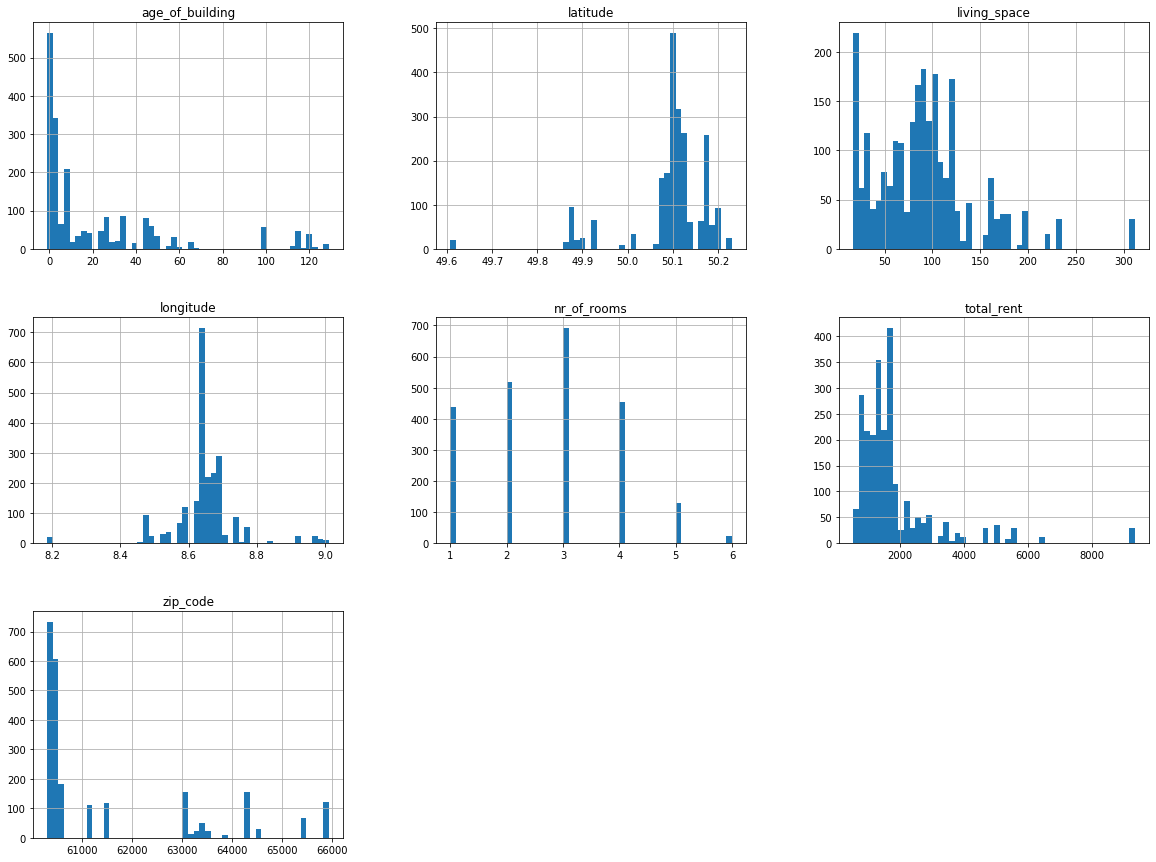

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
#create a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

Text(0.5, 1.0, 'House Prices\n(Red X: Frankfurt Hauptbahnhof - Yellow X: Darmstadt Luisenplatz)')

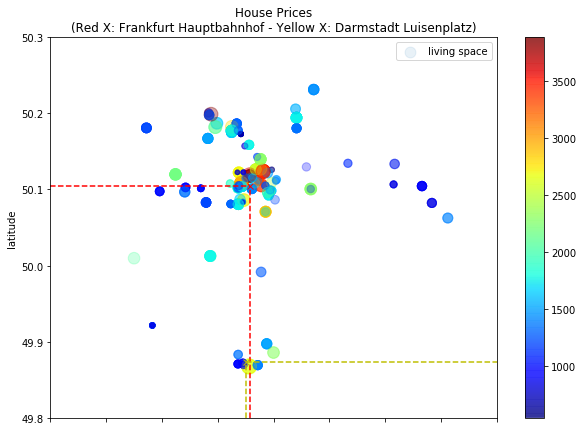

In [18]:
housing = housing[housing['total_rent'] <= 4000]
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
             figsize=(10,7), s=housing['living_space'], label='living space',
             c=housing['total_rent'], cmap=plt.get_cmap('jet', 5000), colorbar=True)
plt.legend()

# Frankfurt Hauptbahnhof
plt.plot([8.65749737], [50.10416625], 'rx')
plt.plot([8.65749737, 8.65749737], [49.8, 50.10416625], 'r--')
plt.plot([8.3, 8.65749737], [50.10416625, 50.10416625], 'r--')

# Darmstadt Luisenplatz
plt.plot([8.651180], [49.872768], 'yx')
plt.plot([8.651180, 8.651180], [49.8, 49.872768], 'y--')
plt.plot([8.651180, 9.1], [49.872768, 49.872768], 'y--')

plt.axis([8.3, 9.1, 49.8, 50.3])
plt.gca().set_title('House Prices\n(Red X: Frankfurt Hauptbahnhof - Yellow X: Darmstadt Luisenplatz)')

In [21]:
corr_matrix = housing.corr()
corr_matrix['total_rent'].sort_values(ascending=False)

total_rent         1.000000
living_space       0.832353
nr_of_rooms        0.583961
latitude           0.133183
longitude          0.083517
age_of_building    0.047954
zip_code          -0.235943
Name: total_rent, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a23f0a0>,
      dtype=object)

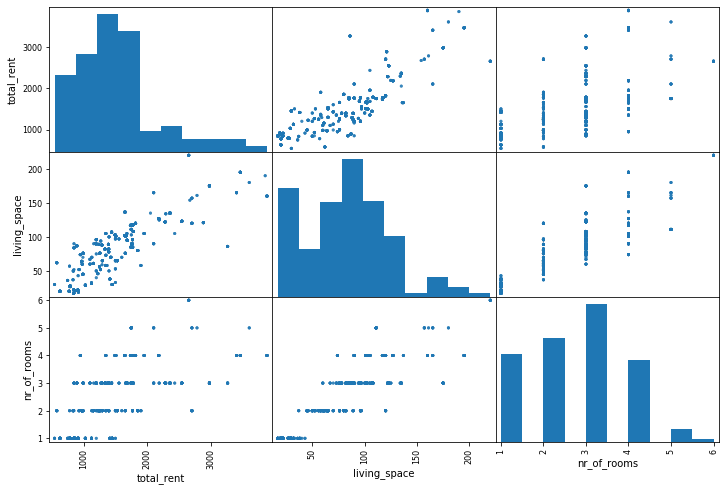

In [23]:
from pandas.plotting import scatter_matrix
attributes = ['total_rent', 'living_space', 'nr_of_rooms']
scatter_matrix(housing[attributes], figsize=(12,8))

<font size="9"><br/>Data Cleaning</font>

In [44]:
train_set['building_type'].value_counts()

Etagenwohnung         1206
Penthouse              162
Erdgeschosswohnung     110
Dachgeschoss            87
Maisonette              67
Hochparterre            46
Sonstige                 7
Terrassenwohnung         5
Loft                     4
Name: building_type, dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def data_cleaning(dataset):
    omitted_attribs = ['region', 'street']
    num_attribs = ['total_rent', 'living_space', 'nr_of_rooms', 'age_of_building', 'zip_code', 'latitude', 'longitude']
    cat_attribs = ['building_type']

    dataset.drop(omitted_attribs, axis=1)
    
    num_pipeline = Pipeline([
        ('num_imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])
    
    cat_pipeline = Pipeline([
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ])

    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])

    return full_pipeline.fit_transform(dataset)


housing_prepared = data_cleaning(train_set)

<font size="9"><br/>Training the Model</font>